Status: Draft

## Rao Blackwellization for Variance Reduction

In [34]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

If we have a function $J(X,Y)$ of two random variables $X$ and $Y$ and we want to compute the expectation $\bar J = \mathbb E_{X,Y}[J(X,Y)]$.

We define $$\bar J(X)= \mathbb E_{Y}[J(X,Y)\mid X] = \int_\mathcal{Y} J(X,Y) p( y \mid X) dy$$  

Note that:
$$
\int_\mathcal{X} \int_\mathcal{Y} p(x, y) J(X=x,Y=y) p(x, y) dx dy= \int_\mathcal{X} p(x) \left( \int_\mathcal{Y} J(X=x, Y=y) p( y \mid X=x) dy \right) dx
$$
i.e.

 $$\mathbb E_{X,Y}[J(X,Y)] = \mathbb E_{X} [\bar J(X)]$$
 
So, we can use $\bar J(X)$ instead of $J(X, Y)$ in a Monte-Carlo estimate, e.g. if we can compute $\bar 
J(X)$ analytically. 



#### Variance of $J(X,Y)$ vs $\bar J(X)$

by the ["law of total variance"](https://en.wikipedia.org/wiki/Law_of_total_variance) we have

$$
\begin{align}
var(J(X,Y)) &= \mathbb E\left[ var(J(X,Y) \mid X) \right] + var( \mathbb E\left[ J(X,Y) \mid X \right] )\\
    &= \mathbb E\left[ \mathbb E[(J(X,Y)-\bar J(X))^2\mid X]- (\mathbb E[J(X,Y)-\bar J(X)\mid X])^2 \right] + var( \bar J(X) )\\
    &= \mathbb E\left[ \mathbb E[(J(X,Y)-\bar J(X))^2\mid X]- (\bar J(X)-\bar J(X)  )^2 \right] + var( \bar J(X) ) \\
    &= \mathbb E_X\left[ \mathbb E_Y[(J(X,Y)-\bar J(X))^2\mid X] \right] + var( \bar J(X) ) \\
    &= \mathbb E_{X,Y}\left[ (J(X,Y)-\bar J(X))^2 \right] + var( \bar J(X) ) \\
\end{align}
$$

i.e.:

$$
var(J(X,Y)) \geq var( \bar J(X) )
$$

Estimation from MC: 
 - _crude MC_ sampling of $X, Y$ pairs: $\hat J \approx \bar J = \mathbb E_{X,Y} [J(X,Y)]$ 
 - _rao-blackwellized_ MC sampling: We need only the $X$ values: $\tilde J \approx \bar J = \mathbb E_{X} [\bar J(X)]$ 



#### Exercise

Assume we draw samples from a multivariate Gaussian. Here we make things simple and assume that
the covariance matrix $\Sigma$ is diagonal:

$$
\begin{pmatrix}
x  \\
y 
\end{pmatrix} \sim \mathcal N \left(\vec \mu, \Sigma \right)
$$

with 
$$
\vec \mu = \begin{pmatrix}
1  \\
-2 
\end{pmatrix}
$$

$$
\Sigma = \begin{pmatrix}
2 & 0 \\
0 & 3
\end{pmatrix}
$$


We want to estimate the expectation $\mathbb E_{X,Y} \left[J(X,Y)\right]$ with 
$$
J(X,Y) = 3x + 2y + 5xy
$$

What is $\bar J(X)$?


Sample from the 

In [35]:
mu_x = 1.
mu_y =-2.
mu = np.array([mu_x, mu_y])

In [36]:
def sample(size=20, 
    mu = mu, 
    sigma=np.array([[2., 0.], [0., 3.]])): 
    xy = np.random.multivariate_normal(mu, sigma, size=size)
    x = xy[:,0]
    y = xy[:,1]
    return x,y

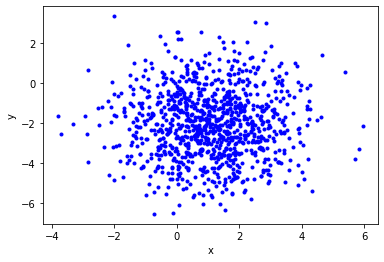

In [37]:
x,y = sample(size=1000)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "b.");

In [38]:
def f_xy(x,y):
    return 3*x + 2*y + 5.* x*y

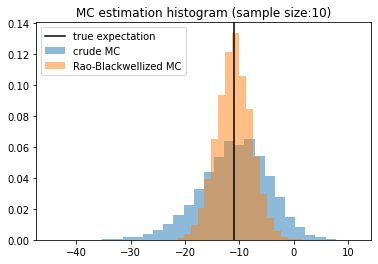

In [44]:
plt.title("MC estimation histogram (sample size:"+str(size)+")")
plt.hist(cmcs, density=True, alpha=0.5, bins=30,label="crude MC")
plt.hist(rbmcs, density=True, alpha=0.5, bins=20, label="Rao-Blackwellized MC")
plt.axvline(true_expectation, color ="k", label="true expectation")
plt.legend();

In [45]:
print("variance of crude estimator", cmcs.var(ddof=1))
print("variance of rao-blackwellized estimator", rbmcs.var(ddof=1))
print(cmcs.var(ddof=1)," approx ", rbmcs.var(ddof=1) + ((cmcs-rbmcs)**2).mean() )

variance of crude estimator 39.59392224154448
variance of rao-blackwellized estimator 10.050073774591121
39.59392224154448  approx  39.21136575157144


#### Literature:

- 